# Water Quality Potability
Louis Mayco D. W. / 1906379296 <br>
dataset : https://www.kaggle.com/adityakadiwal/water-potability?select=water_potability.csv 

Data Description:
- pH       : pH of water 
- Hardness : capacity of water to precipitate soap in mg/L
- Solids   : total dissolved solids in ppm
- Chloramines : ammount of chloramines in ppm
- Sulfate: ampunt of sulfates dissolved in mg/L
- Conductivity : Electrical conductivity of water in uS/cm
- Organic_carbon: ammount of organic carbon in ppm
- Trihalomethanes: Amount of Trihalomethanes in μg/L.
- Turbidity: Measure of light emiting property of water in NTU.
- Potability: Indicates if water is safe for human consumption. Potable :1 and Not potable :0

#0. Import library


In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  

In [191]:
!pip install graphviz

In [192]:
!pip install pydotplus

# 1. Pre-processing

## 1.1 Dataset

In [193]:
url = 'https://raw.githubusercontent.com/louis-not/Water_Quality_Potability/main/water_potability.csv' 
df = pd.read_csv(url)

In [194]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [195]:
# dataset size
df.shape

(3276, 10)

In [196]:
# dataset data type
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [197]:
# Statistical Properties of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [198]:
# check null dataset
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## 1.2 Impute Missing Values

### 1.2.1 pH

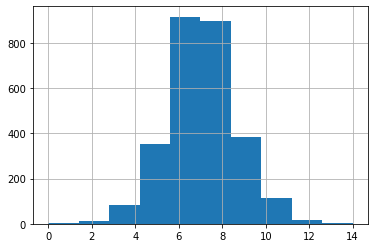

In [199]:
df['ph'].hist()

In [200]:
# based on the distribution type we would use median to impute pH
imputer = SimpleImputer(strategy="median")
imputer.fit(df[['ph']])
df[['ph']] = imputer.transform(df[['ph']])
df[['ph']].isna().sum()

ph    0
dtype: int64

### 1.2.2 sulfate

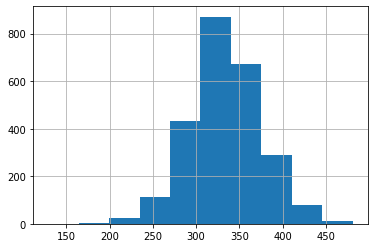

In [201]:
df['Sulfate'].hist()

In [202]:
# based on the distribution type we would use median to impute Sulfate
imputer = SimpleImputer(strategy="median")
imputer.fit(df[['Sulfate']])
df[['Sulfate']] = imputer.transform(df[['Sulfate']])
df[['Sulfate']].isna().sum()

Sulfate    0
dtype: int64


### 1.2.3 Trihalomethanes

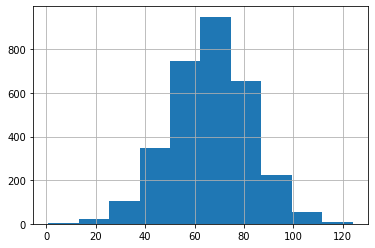

In [203]:
df['Trihalomethanes'].hist()

In [204]:
# based on the distribution type we would use median to impute Trihalomethanes
imputer = SimpleImputer(strategy="median")
imputer.fit(df[['Trihalomethanes']])
df[['Trihalomethanes']] = imputer.transform(df[['Trihalomethanes']])
df[['Trihalomethanes']].isna().sum()

Trihalomethanes    0
dtype: int64

## 1.3 Split Data

In [205]:
X = df.drop(['Potability'], axis = 1)
y = df.Potability


In [206]:
# get columns (for modelling use)
header = [*X.columns]
header

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

In [207]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [208]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [209]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
# random_state = 0 --> random seed 
print("Xtrain : ", X_train.shape)
print("Xtest  : ",X_test.shape )
print("ytrain : ", y_train.shape)
print("ytest  : ",y_test.shape )


Xtrain :  (2293, 9)
Xtest  :  (983, 9)
ytrain :  (2293,)
ytest  :  (983,)


## 1.4 Feature Normalization

In [210]:
scaler = MinMaxScaler()

In [211]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [212]:
df_X_train_scaled = pd.DataFrame(X_train_scaled,columns=header)
df_X_test_scaled = pd.DataFrame(X_test_scaled,columns=header)

## 1.5 Principle Component Analysis (PCA)

In [252]:
df_X_test_scaled

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.539274,0.629235,0.619119,0.540284,0.469175,0.173230,0.449451,0.631534,0.608331
1,0.425232,0.490445,0.381238,0.389832,0.546293,0.566705,0.477247,0.485415,0.546185
2,0.448033,0.494472,0.280616,0.459594,0.607867,0.537066,0.314692,0.254230,0.514193
3,0.504801,0.487173,0.293361,0.616378,0.552422,0.689924,0.324025,0.506397,0.484277
4,0.345675,0.437319,0.484186,0.632571,0.550639,0.637838,0.640479,0.558503,0.774384
...,...,...,...,...,...,...,...,...,...
978,0.543323,0.623240,0.270082,0.658914,0.495776,0.562367,0.510593,0.483813,0.286949
979,0.601784,0.524212,0.517444,1.000000,0.000000,0.606522,0.399185,0.624145,0.517586
980,0.448033,0.539761,0.275383,0.575353,0.723303,0.582859,0.617717,0.544660,0.561874
981,0.357278,0.517414,0.497828,0.542396,0.567542,0.266754,0.429708,0.580354,0.495746


In [253]:
pca = PCA(n_components=4)
X_pca_train = pca.fit_transform(X_train_scaled)
X_pca_test = pca.fit_transform(X_test_scaled)
# df_pca = pd.DataFrame(data = X_pca, columns = ['PCA1','PCA2','PCA3'])

#2. Machine Learning Modelling (Decision Tree)

## 2.1 Without Optimization

In [342]:
# with PCA
clf1 = DecisionTreeClassifier(criterion='entropy')
clf1 = clf1.fit(X_pca_train, y_train)
y_pred_pca = clf1.predict(X_pca_test)

In [343]:
print(classification_report(y_test,y_pred_pca))

              precision    recall  f1-score   support

           0       0.60      0.59      0.59       610
           1       0.35      0.36      0.36       373

    accuracy                           0.50       983
   macro avg       0.48      0.47      0.47       983
weighted avg       0.51      0.50      0.50       983



In [274]:
print(confusion_matrix(y_test,y_pred_pca))

[[358 252]
 [229 144]]


[Text(164.06911029817564, 215.07652173913044, 'X[0] <= 0.204\nentropy = 0.968\nsamples = 2293\nvalue = [1388, 905]'),
 Text(85.66233509183698, 210.3495652173913, 'X[1] <= -0.194\nentropy = 0.959\nsamples = 2054\nvalue = [1272, 782]'),
 Text(30.659827363825773, 205.62260869565216, 'X[1] <= -0.203\nentropy = 0.998\nsamples = 180\nvalue = [95, 85]'),
 Text(24.91318583192777, 200.89565217391305, 'X[3] <= 0.359\nentropy = 0.99\nsamples = 165\nvalue = [92, 73]'),
 Text(23.850223236432186, 196.1686956521739, 'X[2] <= 0.285\nentropy = 0.987\nsamples = 162\nvalue = [92, 70]'),
 Text(22.787260640936598, 191.44173913043477, 'X[2] <= 0.258\nentropy = 0.991\nsamples = 158\nvalue = [88, 70]'),
 Text(21.724298045441014, 186.71478260869566, 'X[0] <= 0.028\nentropy = 0.987\nsamples = 155\nvalue = [88, 67]'),
 Text(9.16805238614942, 181.98782608695652, 'X[0] <= -0.167\nentropy = 0.956\nsamples = 114\nvalue = [71, 43]'),
 Text(4.251850381982339, 177.26086956521738, 'X[2] <= 0.198\nentropy = 0.997\nsample

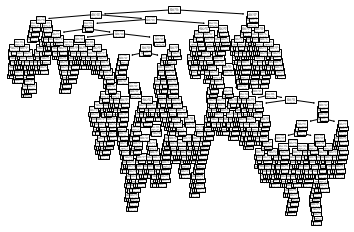

In [341]:
plot_tree(clf1)

In [276]:
# without PCA
# clf2 = DecisionTreeClassifier(criterion='entropy')
# clf2 = clf2.fit(X_train_scaled, y_train)
# y_pred = clf.predict(X_test_scaled)

In [277]:
# print(classification_report(y_test,y_pred))

In [278]:
# confusion_matrix(y_test,y_pred)

## 2.2 Wihtout Library

In [258]:
eps = np.finfo(float).eps
from numpy import log2 as log

In [259]:
def calculate_entropy_target(data):
  S = 0
  values = data.unique()
  for val in values:
    p = data.value_counts()[val]/len(y)
    S = S + p * log(p)
  return -S

In [260]:
calculate_entropy_target(y_test)

0.8084620344881734

In [261]:
def calculate_entropy_feature(df_x,y,feature):
  f1 = len(y[y == 0])/len(y)
  f2 = len(y_pred[y == 1])/len(y)
  for i in range(len(x)):
    num

In [262]:
# def categorize_feature(df_x,cutoff):
  

# 3. Optimization

In [317]:
# from model
def model_evaluation (param={}):
  clfe = DecisionTreeClassifier(criterion='entropy',**param)
  clfe = clfe.fit(X_pca_train, y_train)
  y_pred_pca = clfe.predict(X_pca_test)
  Conf = confusion_matrix(y_test,y_pred_pca)
  TP = Conf[0][0] 
  FP = Conf[1][0]
  TN = Conf[1][1]
  FN = Conf[0][1]
  prec = TP / (TP + FP)
  recc = TP / (TP + TN)
  acc = (TP + TN)/(TP + TN + FP + FN)
  F1 = (2 * prec * recc * acc)/ (prec + recc) 
  # print(prec, recc, F1)
  return recc

## Hyperparameter Tuning

In [338]:
# using constrainded optimization
max_depth_list = [i for i in range(1,7)]
min_impurity_decrease_list = [i/10 for i in range(0,20)]
min_weight_fraction_leaf_list = [i*0.01 for i in range(0,10)] 

In [339]:
F1_score_set = {}
for max_depth in max_depth_list:
  for min_impurity_decrease in min_impurity_decrease_list:
    for min_weight_fraction_leaf in min_weight_fraction_leaf_list:
      params = {'min_weight_fraction_leaf':min_weight_fraction_leaf,'max_depth': max_depth,'min_impurity_decrease':min_impurity_decrease}
      F1 = model_evaluation(params)
    
      F1_score_set[(min_weight_fraction_leaf,max_depth,min_impurity_decrease)] = {'score':F1}

In [340]:
df_results = pd.DataFrame(F1_score_set).T.reset_index()
df_results.columns = ['min_weight_fraction_leaf','max_depth','min_impurity_decrease','score']
df_results.sort_values(['score'],ascending=False)

,min_weight_fraction_leaf,max_depth,min_impurity_decrease,score
1199,0.09,6,1.9,1.000000
762,0.02,4,1.6,1.000000
768,0.08,4,1.6,1.000000
767,0.07,4,1.6,1.000000
766,0.06,4,1.6,1.000000
...,...,...,...,...
800,0.00,5,0.0,0.905429
402,0.02,3,0.0,0.904847
401,0.01,3,0.0,0.904676
1002,0.02,6,0.0,0.903525


## Evaluation

In [326]:
final_params = {'min_weight_fraction_leaf':0.12		,'max_depth': 4	,'min_impurity_decrease':0}

In [327]:
# with PCA
clf3 = DecisionTreeClassifier(criterion='entropy',**final_params)
clf3 = clf3.fit(X_pca_train, y_train)
y_pred_pca3 = clf3.predict(X_pca_test)

In [328]:
print(confusion_matrix(y_test,y_pred_pca3))

[[507 103]
 [320  53]]


In [329]:
print(classification_report(y_test,y_pred_pca3))

              precision    recall  f1-score   support

           0       0.61      0.83      0.71       610
           1       0.34      0.14      0.20       373

    accuracy                           0.57       983
   macro avg       0.48      0.49      0.45       983
weighted avg       0.51      0.57      0.51       983



[Text(209.25, 195.696, 'X[0] <= 0.183\nentropy = 0.968\nsamples = 2293\nvalue = [1388, 905]'),
 Text(167.4, 152.208, 'X[1] <= 0.033\nentropy = 0.958\nsamples = 2004\nvalue = [1244, 760]'),
 Text(83.7, 108.72, 'X[1] <= -0.137\nentropy = 0.943\nsamples = 1202\nvalue = [769, 433]'),
 Text(41.85, 65.232, 'entropy = 0.981\nsamples = 348\nvalue = [202, 146]'),
 Text(125.55000000000001, 65.232, 'X[3] <= 0.009\nentropy = 0.921\nsamples = 854\nvalue = [567, 287]'),
 Text(83.7, 21.744, 'entropy = 0.946\nsamples = 469\nvalue = [298, 171]'),
 Text(167.4, 21.744, 'entropy = 0.883\nsamples = 385\nvalue = [269, 116]'),
 Text(251.10000000000002, 108.72, 'X[2] <= -0.053\nentropy = 0.975\nsamples = 802\nvalue = [475, 327]'),
 Text(209.25, 65.232, 'entropy = 0.942\nsamples = 284\nvalue = [182, 102]'),
 Text(292.95, 65.232, 'entropy = 0.988\nsamples = 518\nvalue = [293, 225]'),
 Text(251.10000000000002, 152.208, 'entropy = 1.0\nsamples = 289\nvalue = [144, 145]')]

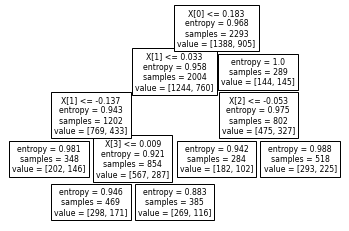

In [330]:
plot_tree(clf3)